**Créditos**: baseado nun código visto en: https://medium.com/@a.fernandez.troyano/nube-de-palabras-word-cloud-con-python-a-partir-de-varias-webs-111e94220822

Repo orixinal: https://github.com/bigdatawirtz/nubes/blob/main/nube_de_respostas.ipynb

# Facendo unha nube de palabras

## Instalando dependencias

- conda activate bigdata

- conda install numpy pandas

- conda install -c conda-forge wordcloud nltk

## Activamos bigdata e instalamos numpy pandas:

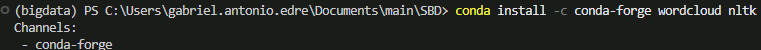

## Instalamos el wordcloud nltk
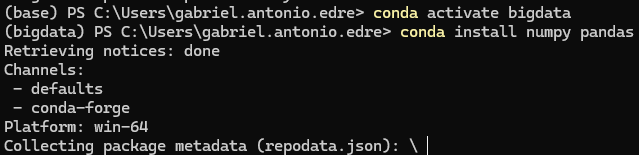

## Cargamos librarías

In [1]:
#Librerías básicas
import numpy as np
import pandas as pd

#Librerías para imaxes, nubes de palabras e plot
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

#Librarías para limpieza de datos
import string
import nltk
from nltk.corpus import stopwords

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabriel.antonio.edre\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


True

**Carga de texto**

In [3]:
#eleccion = input("")
archivo = open("./archivos/defino.txt", "r")
texto = archivo.read()


In [4]:
texto

'Moitos, moitos, moitos pero moitos datos.\nBig Data é unha base de datos mooooooiiiiiii grande\nDatos a grande escala que precisan de aplicaciones de software para a súa análise.\nO Big data é o conxunto de tecnoloxías creadas para  analizar grandes cantidades de datos\nBig Data é o conxunto de datos masivos que necesitan tecnoloxías avanzadas para ser almacenados, procesados e analizados.\nO big data é unha gran cantidade de datos que se poden tratar, analizar e debuxar para obter información deles.\nO big data pódese definir como a xestión e a análise de grandes cantidades de datos, o obxectivo é transformar os miles de datos que xeran os dispositivos conectados a internet, en información útil e fácil de manexar.\nO Big Data é un conxunto de tecnoloxías que nos permiten interactuar e traballar cunha gran cantidade de datos.\nO Big Data e un gran conxunto de datos que se poden analizar e examinar para sacar ideas e conclusións.\nTodo o proceso de recopilación, procesamento e tratado 

**Limpeza do texto**

In [5]:
#Generación de lista de signos de puntuación

punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

punctuation[:10] #Ejemplo de los símbolos de puntuación que están incluidos

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*']

In [6]:
#Listado de palabras que queremos eliminar del texto
#Es un proceso iterativo por lo que si después vemos que nos siguen quedado "caractéres raros" simplemente venímos aquí y los agregamos
#Existe librerías y listados de "Stop_words", pero por ahora vamos a dejarlo vacío

#nltk.download('stopwords') #La primera vez debemos descargar las "stopwords"

stop_words = stopwords.words('spanish') #Listado de palabras a eliminar

stop_words += ["\u200b", "\xa0", "para", "como", "puede","cómo", "hacer", "forma", "parte", "hace", "además", "según", "pueden", "ser"] #Añadimos algunos caractéres que hemos encontrado

stop_words[:10]


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [7]:
global clean_texto
clean_texto = texto

def FormatearCadena():
    global clean_texto
    #Reemplazamos signos de puntuación por "":
    for sw in stop_words:
        clean_texto = clean_texto.lower().replace(" "+sw+" "," ")
        
    for p in punctuation:
        clean_texto = clean_texto.replace(p," ")

    #Eliminamos espacios blancos, saltos de línea, tabuladores, etc    
    #clean_texto = " ".join(clean_texto.split())    

    #Reemplazamos stop_words por "":    
    for stop in stop_words:
        clean_texto_list = clean_texto.split()
        clean_texto_list = [i.strip() for i in clean_texto_list]
        try:
            while stop in clean_texto_list: clean_texto_list.remove(stop)
        except:
            print("Error")
            pass
        clean_texto= " ".join(clean_texto_list)
    
    print(clean_texto)

FormatearCadena()

moitos moitos moitos moitos datos big data é unha base datos mooooooiiiiiii grande datos grande escala precisan aplicaciones software súa análise big data é conxunto tecnoloxías creadas analizar grandes cantidades datos big data é conxunto datos masivos necesitan tecnoloxías avanzadas almacenados procesados analizados big data é unha gran cantidade datos poden tratar analizar debuxar obter información deles big data pódese definir xestión análise grandes cantidades datos obxectivo é transformar miles datos xeran dispositivos conectados internet información útil fácil manexar big data é conxunto tecnoloxías permiten interactuar traballar cunha gran cantidade datos big data gran conxunto datos poden analizar examinar sacar ideas conclusións proceso recopilación procesamento tratado grande cantidades datos non viable fixeran persoas polo seu tamaño big data datos masivos término describe gran volumen datos crece manera exponencial paso tiempo conjunto datos tan grande complejo ninguna her

In [8]:
lista_texto = clean_texto.split(" ")

palabras = []

#Paso intermedio para eliminar palabras muy cortas (emoticonos,etc) y muy largas (ulr o similar) que se nos hayan pasado:

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

**Contaxe de palabras**

In [9]:
#Generamos un diccionario para contabilizar las palabras:

word_count={}

for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]

In [10]:
#Generamos el DF y lo ordenamos:

df = pd.DataFrame.from_dict(word_count).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(10)

,freq
datos,22
big,14
data,14
conxunto,5
gran,5
moitos,4
tecnoloxías,4
grandes,4
grande,4
información,4


**Mostrar gráfica de ocorrencias das palabras**

In [11]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

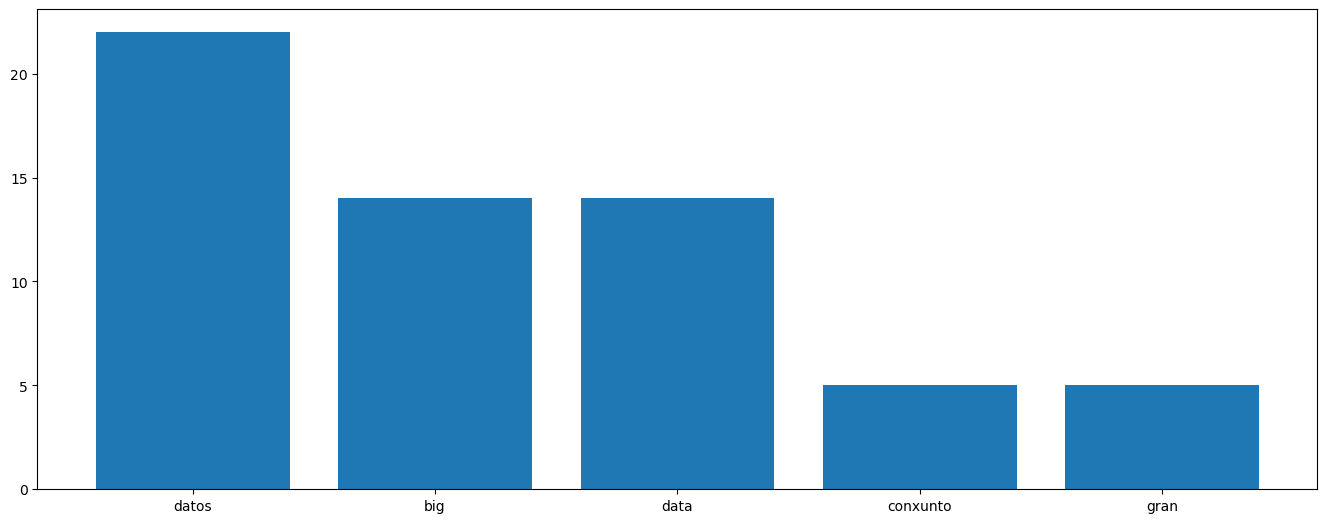

In [12]:
#Graficamos el TOP 5 palabras por frecuencia

plot_bar(data=df, top=5)

**Crear nube de palabras**

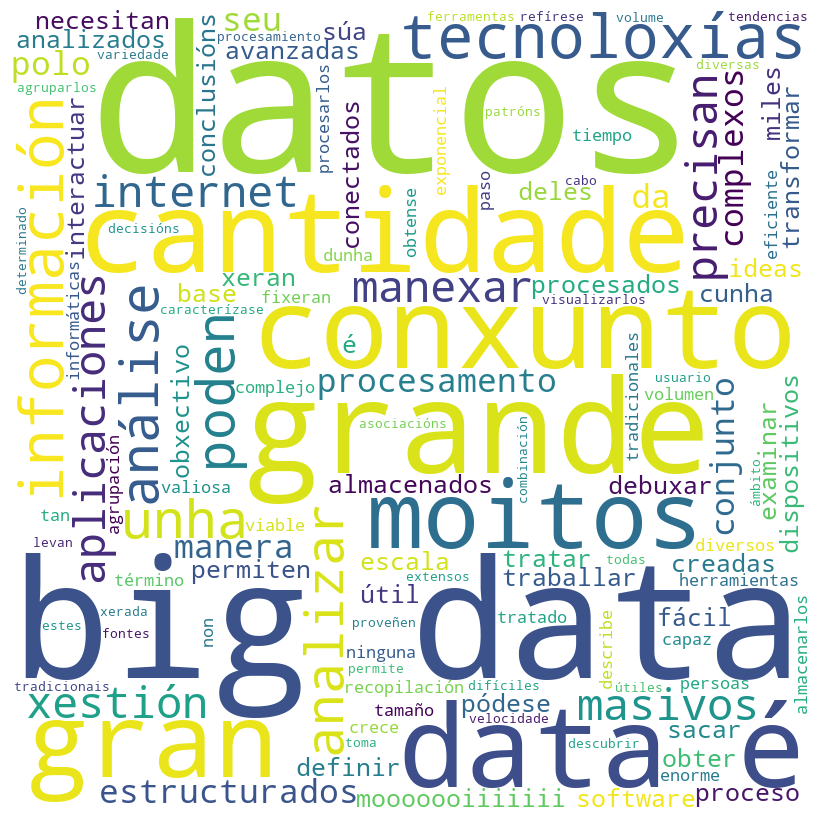

In [13]:
#word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(clean_texto)
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5).generate(clean_texto)

#word_cloud.to_file("./img/ejemplo_sencillo.png") #Guardamos la imagen generada
#word_cloud.to_file("./img/ejemplo_sencillo.png") #Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()